## 1 加载数据查看数据基本情况

In [1]:
import pandas as pd
#加载数据，需要注意 这里有一个参数sep指定了数据的分隔符，默认是逗号
#如果使用其他字符作为分隔符可以通过这个sep参数进行指定
df = pd.read_csv(r'E:\develop\数据\gapminder.tsv',sep='\t')

In [2]:
df.columns  #列名

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [3]:
df.shape #1704行 6列

(1704, 6)

In [4]:
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.332, 9240934, 820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.10071],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499603],
       ['Zimbabwe', 'Africa', 2002, 39.989, 11926563, 672.0386227],
       ['Zimbabwe', 'Africa', 2007, 43.487, 12311143, 469.7092981]],
      dtype=object)

In [5]:
df.info()
#df.info()  了解数据的条目数，有多少行，多少列，每一列都是什么类型，每一列是否有缺失值 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [6]:
df.describe()
#默认只展示数值类型分布情况 如果想查看字符串类型的可以传入 include=‘object’也可以‘all’

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## 2 加载部分数据

In [7]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [8]:
#筛选指定列
df[['country','year','pop']]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


### 2.1 loc和oloc两个属性

想访问指定行，指定列的数据，可以通过两种途径，一个是名称一个是下标
- df.loc # 通过行/列名称进行访问
- df.iloc # 通过行/列下标进行访问

In [9]:
cols = ['country','year','pop']
df_2007 = df[cols][df[cols]['year']==2007]
df_2007.head()

,country,year,pop
11,Afghanistan,2007,31889923
23,Albania,2007,3600523
35,Algeria,2007,33333216
47,Angola,2007,12420476
59,Argentina,2007,40301927


In [10]:
df_2007.loc[35]

country     Algeria
year           2007
pop        33333216
Name: 35, dtype: object

In [11]:
df_2007.iloc[2]

country     Algeria
year           2007
pop        33333216
Name: 35, dtype: object

In [12]:
df_2007.loc[[35,47,],['pop','country']]

,pop,country
35,33333216,Algeria
47,12420476,Angola


In [13]:
df_2007.iloc[[2,3],[2,0]]

,pop,country
35,33333216,Algeria
47,12420476,Angola


## 3 通过分组聚合计算结果 回答问题

In [14]:
df['year'].value_counts()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: count, dtype: int64

In [15]:
df['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [16]:
df[df['year'] == 1952]['lifeExp'].mean()

49.057619718309866

In [17]:
#每一年的平均年龄是多少 groupby分组 帅选出分组字段取值相同的部分作为一组
#‘year’就是使用年份进行分组，数据中的年份相同的会放到同一组中
#同一组的数据对['life1Exp'] 就是预期寿命 进行聚合计算， 这里我们选择mean（）这个聚合函数 就是算平均值
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [18]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [19]:
#每一年的平均人口
df.groupby('year')['pop'].mean()

year
1952    1.695040e+07
1957    1.876341e+07
1962    2.042101e+07
1967    2.265830e+07
1972    2.518998e+07
1977    2.767638e+07
1982    3.020730e+07
1987    3.303857e+07
1992    3.599092e+07
1997    3.883947e+07
2002    4.145759e+07
2007    4.402122e+07
Name: pop, dtype: float64

In [20]:
#每一年的平均GDP
df.groupby('year')['gdpPercap'].mean()

year
1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
Name: gdpPercap, dtype: float64

In [21]:
#每年每个大洲的平均寿命
df.groupby(['year','continent'])['lifeExp'].mean()

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [22]:
df.groupby(['year','continent'])['gdpPercap'].mean()

year  continent
1952  Africa        1252.572466
      Americas      4079.062552
      Asia          5195.484004
      Europe        5661.057435
      Oceania      10298.085650
1957  Africa        1385.236062
      Americas      4616.043733
      Asia          5787.732940
      Europe        6963.012816
      Oceania      11598.522455
1962  Africa        1598.078825
      Americas      4901.541870
      Asia          5729.369625
      Europe        8365.486814
      Oceania      12696.452430
1967  Africa        2050.363801
      Americas      5668.253496
      Asia          5971.173374
      Europe       10143.823757
      Oceania      14495.021790
1972  Africa        2339.615674
      Americas      6491.334139
      Asia          8187.468699
      Europe       12479.575246
      Oceania      16417.333380
1977  Africa        2585.938508
      Americas      7352.007126
      Asia          7791.314020
      Europe       14283.979110
      Oceania      17283.957605
1982  Africa        2481

## 4 数据可视化

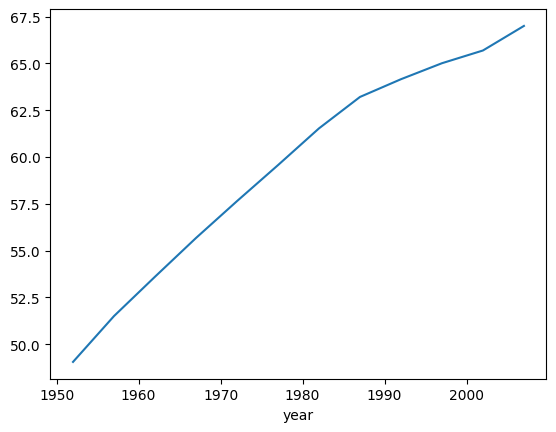

In [23]:
#.plot()默认是折线图
import matplotlib.pyplot as plt
df.groupby('year')['lifeExp'].mean().plot()
plt.show()

<Axes: xlabel='year'>

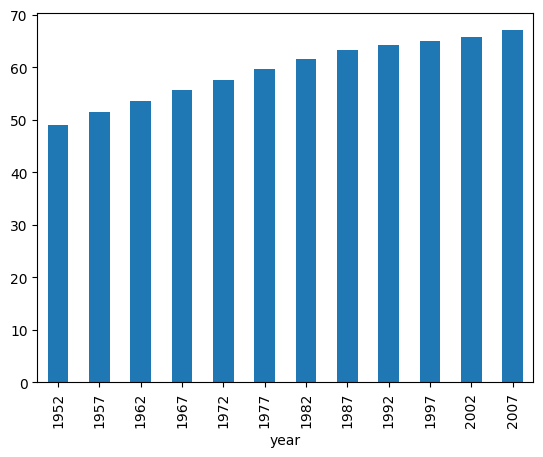

In [24]:
df.groupby('year')['lifeExp'].mean().plot(kind = 'bar')

## 5每一年每一个大洲gdp最多的国家

### 解法一 先排序，再去重

In [25]:
#先排序，再去重
#通过'year','countinent','gdpPercap'排序
#ascending = [True,True,False] year 字段升序排列 contient 生序排列 gdpPercap降序排列
df_ordered = df.sort_values(['year','continent','gdpPercap'],ascending=[True,True,False])
# 去掉‘year’,'contient'相同的
df_ordered.drop_duplicates(['year','continent'])

,country,continent,year,lifeExp,pop,gdpPercap
1404,South Africa,Africa,1952,45.009,14264935,4725.295531
1608,United States,Americas,1952,68.440,157553000,13990.482080
852,Kuwait,Asia,1952,55.565,160000,108382.352900
1476,Switzerland,Europe,1952,69.620,4815000,14734.232750
1092,New Zealand,Oceania,1952,69.390,1994794,10556.575660
1405,South Africa,Africa,1957,47.985,16151549,5487.104219
1609,United States,Americas,1957,69.490,171984000,14847.127120
853,Kuwait,Asia,1957,58.033,212846,113523.132900
1477,Switzerland,Europe,1957,70.560,5126000,17909.489730
1093,New Zealand,Oceania,1957,70.260,2229407,12247.395320


### 解法二 分组聚合结果与原始数据merge

In [26]:
max_result = df.groupby(['year','continent'])[['gdpPercap']].max()
max_result.merge(df,on = 'gdpPercap')

,gdpPercap,country,continent,year,lifeExp,pop
0,4725.295531,South Africa,Africa,1952,45.009,14264935
1,13990.482080,United States,Americas,1952,68.440,157553000
2,108382.352900,Kuwait,Asia,1952,55.565,160000
3,14734.232750,Switzerland,Europe,1952,69.620,4815000
4,10556.575660,New Zealand,Oceania,1952,69.390,1994794
5,5487.104219,South Africa,Africa,1957,47.985,16151549
6,14847.127120,United States,Americas,1957,69.490,171984000
7,113523.132900,Kuwait,Asia,1957,58.033,212846
8,17909.489730,Switzerland,Europe,1957,70.560,5126000
9,12247.395320,New Zealand,Oceania,1957,70.260,2229407
